In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1>Load MNIST</h1>

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

def load_data_mnist():
    (trainX, trainY), (testX, testY) = mnist.load_data()
    trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)/255
    testX = testX.reshape(testX.shape[0], 28, 28, 1)/255
    return testX, trainX, to_categorical(testY), to_categorical(trainY)
    

testX, trainX, testY, trainY = load_data_mnist()
print(testY)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<h1>Convolutional Neural Network</h1>

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

model = Sequential([
    InputLayer((28, 28, 1)),
    ZeroPadding2D(padding=(3, 3)),
    Conv2D(32, kernel_size=(7, 7), strides=(1, 1)),
    BatchNormalization(axis=3),
    ReLU(),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=10, activation="sigmoid"),
])

opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer = opt, metrics=["accuracy"], loss="categorical_crossentropy")

In [7]:
model.fit(trainX, trainY, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9805 - loss: 0.0625
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.9865 - loss: 0.0448
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.9894 - loss: 0.0339


In [8]:
model.evaluate(testX, testY)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9851 - loss: 0.0447


[0.03625261411070824, 0.9882000088691711]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([5])

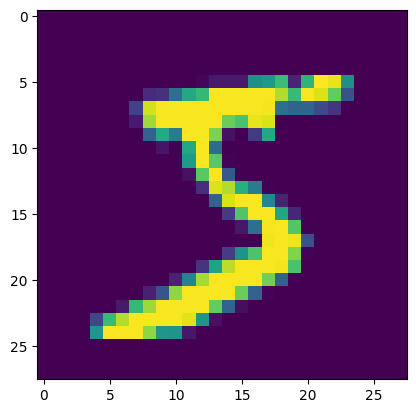

In [23]:
import matplotlib.pyplot as plt
plt.imshow(trainX[0])
model.predict(trainX[0:1]).argmax(-1)

<h1>Activation Functions & Derivatives</h1>

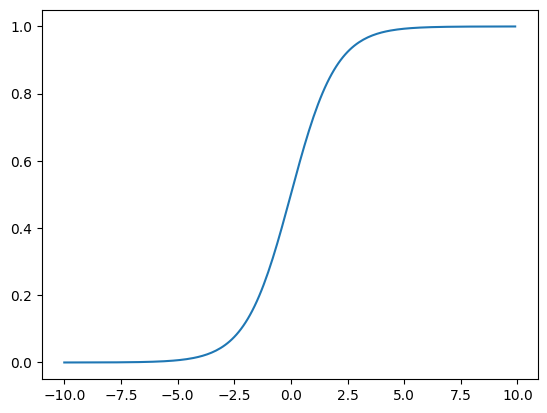

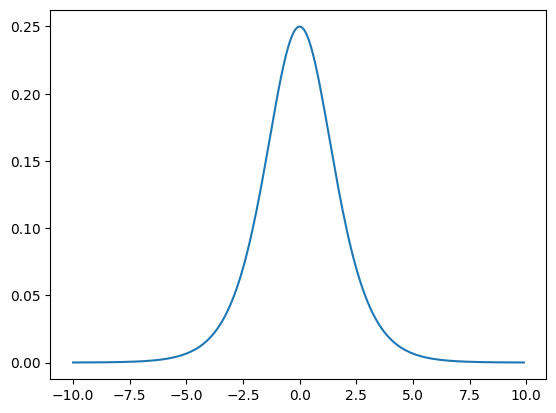

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

def derivative_sigmoid(x):
    return sigmoid(x)*(1 - sigmoid(x))

def softmax(x):
    z = np.sum(np.exp(x))
    

x = np.array([x/10 for x in range(-100, 100)])

plt.plot(x, sigmoid(x))
plt.show()
plt.plot(x, derivative_sigmoid(x))